In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from collections import Counter

In [11]:
# Load the dataset
df = pd.read_csv("SentimentData.csv")  # Adjust filename if needed
print("Dataset Preview:")
print(df.head())

# Data Exploration and Visualization
print("Dataset Information:")
print(df.info())
print("Label Distribution:")
print(df['status'].value_counts())

Dataset Preview:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
Label Distribution:
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar 

In [15]:
# Data Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = text.replace("[^a-zA-Z]", " ")
    return text

df['statement'] = df['statement'].astype(str).apply(preprocess_text)

In [17]:
# Encode labels
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [19]:
# Tokenization & Padding
max_words = 10000  # Vocabulary size
max_length = 100  # Max length of sequences
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['statement'])
sequences = tokenizer.texts_to_sequences(df['statement'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['status'], test_size=0.2, random_state=42)

In [23]:
# Build the LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(df['status'].unique()), activation='softmax')  # Multi-class classification
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

C:\Users\abcd\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 115s 82ms/step - accuracy: 0.4998 - loss: 1.3295 - val_accuracy: 0.6336 - val_loss: 0.8545
Epoch 2/5
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 111s 83ms/step - accuracy: 0.6660 - loss: 0.7755 - val_accuracy: 0.7172 - val_loss: 0.7118
Epoch 3/5
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 124s 93ms/step - accuracy: 0.7473 - loss: 0.6431 - val_accuracy: 0.7581 - val_loss: 0.6275
Epoch 4/5
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 130s 98ms/step - accuracy: 0.7949 - loss: 0.5382 - val_accuracy: 0.7651 - val_loss: 0.6215
Epoch 5/5
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 136s 94ms/step - accuracy: 0.8269 - loss: 0.4578 - val_accuracy: 0.7639 - val_loss: 0.6316
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7588 - loss: 0.6395
Test Accuracy: 0.7639


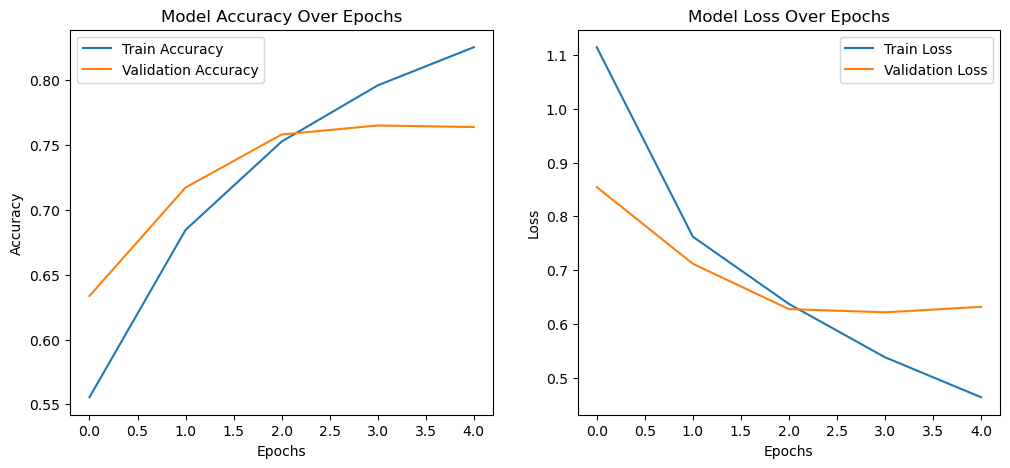

In [25]:
# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')

plt.show()

In [27]:
# Making Predictions
def predict_sentiment(text):
    text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    print(f"Predicted Sentiment: {predicted_label}")
    return predicted_label

# Example Predictions
sample_texts = [
    "I feel so anxious and stressed.",
    "Life is amazing and I am very happy!",
    "I am feeling very low and hopeless.",
    "I am excited about my future endeavors."
]

for text in sample_texts:
    predict_sentiment(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Predicted Sentiment: Anxiety
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Sentiment: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Sentiment: Depression
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Sentiment: Normal


In [29]:
# Conclusion
print("\n--- Analysis Summary ---")
print("1. The dataset contains mental health-related sentiments and is preprocessed for analysis.")
print("2. Word cloud visualization shows key words related to different emotions.")
print("3. The LSTM model is trained to classify different emotional sentiments effectively.")
print("4. The accuracy and loss graphs indicate model performance over training epochs.")
print("5. Sample predictions demonstrate the model's ability to classify emotions from new text inputs.")


--- Analysis Summary ---
1. The dataset contains mental health-related sentiments and is preprocessed for analysis.
2. Word cloud visualization shows key words related to different emotions.
3. The LSTM model is trained to classify different emotional sentiments effectively.
4. The accuracy and loss graphs indicate model performance over training epochs.
5. Sample predictions demonstrate the model's ability to classify emotions from new text inputs.
